# Ford Gobike Analysis
## by Abdelrhman Shookry

## Investigation Overview

> the main focus is on the trip duration, age ,trips, start station, end station, user type, and gender.

## Dataset Overview

> there are 183,412 row in this dataset with 16 column (5 numeric, 8 string, 2 datetime and 1 boolean).

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

df.end_station_id  = df.end_station_id.fillna(-1)
df.start_station_id  = df.start_station_id.fillna(-1)
df.member_birth_year  = df.member_birth_year.fillna(-1)

df.bike_id = df.bike_id.astype("str")
df.end_station_id  = df.end_station_id.astype("int").astype("str")
df.start_station_id  = df.start_station_id.astype("int").astype("str")
df.member_birth_year  = df.member_birth_year.astype("int").astype("str")

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of trip durations

> most trips durations are between 300 sec and 1000 sec (around 8000 trip to 12000 trip) with beak 600 sec.

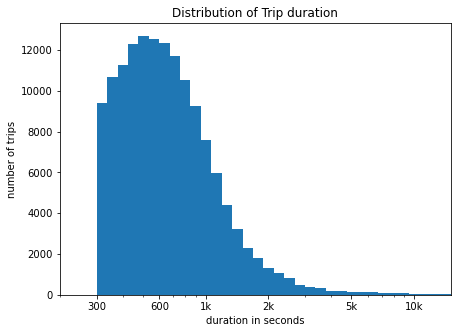

In [4]:
bins = 10 ** np.arange(np.log10(300), np.log10(df['duration_sec'].max()) + 0.05, 0.05)
plt.figure(figsize=[7,5])
plt.hist(data = df, x = 'duration_sec',bins = bins)

plt.title("Distribution of Trip duration")
plt.xlabel("duration in seconds")
plt.ylabel("number of trips")
plt.xlim([200,15000])
plt.xscale('log')
plt.xticks([300, 600, 1e3, 2e3, 5e3, 1e4], [300, 600, '1k', '2k', '5k', '10k'])
plt.show()

## Distribution of user age

> the number of users is increasing till the age of 30 then decreasing, Most users are between 20 and 40 years old with two peaks around 30 and 26 years old.

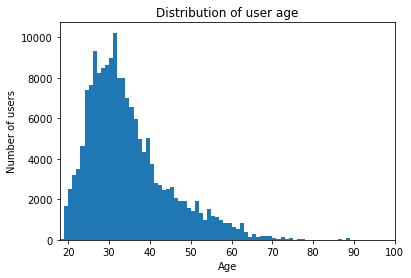

In [5]:
temp = df[df.member_birth_year != '-1']
temp.member_birth_year = temp.member_birth_year
temp['age'] = 2019 - temp.member_birth_year.astype(int)


bins = np.arange(0, temp['age'].max() + 1, 1)

plt.hist(data = temp, x = 'age', bins = bins)
plt.title('Distribution of user age')
plt.xlabel('Age')
plt.ylabel('Number of users')
plt.xlim([18,100])
plt.show()

## Age vs Duration

>most trip durations are lower than 7500 sec and most ages are between 20 and 40 and there is a person with age 140 which is propably a mistake.

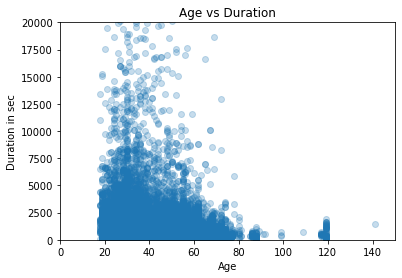

In [6]:
plt.scatter(temp['age'], temp['duration_sec'], alpha = 0.25)
plt.xlim([0,150])
plt.ylim([0,20000])
plt.title('Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration in sec')
plt.show()

## mean trip duration for each day

> the highest trip means were in days 10, 17, 23.

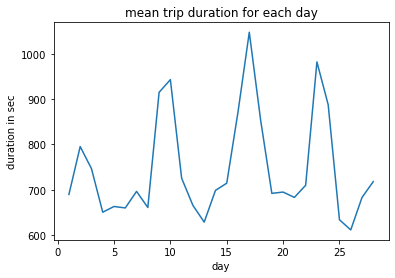

In [7]:
t = df
t['day'] = df['start_time'].dt.day
t = t.groupby('day')['duration_sec']

sb.lineplot(y = t.agg('mean'), x = t.agg('mean').index)
plt.title('mean trip duration for each day')
plt.xlabel('day')
plt.ylabel('duration in sec')
plt.show()

## Distribution of trips

> as we can see that From Berry St at 4th St to San Francisco Ferry Building (Harry Bridges Plaza) is the most frequent trip.

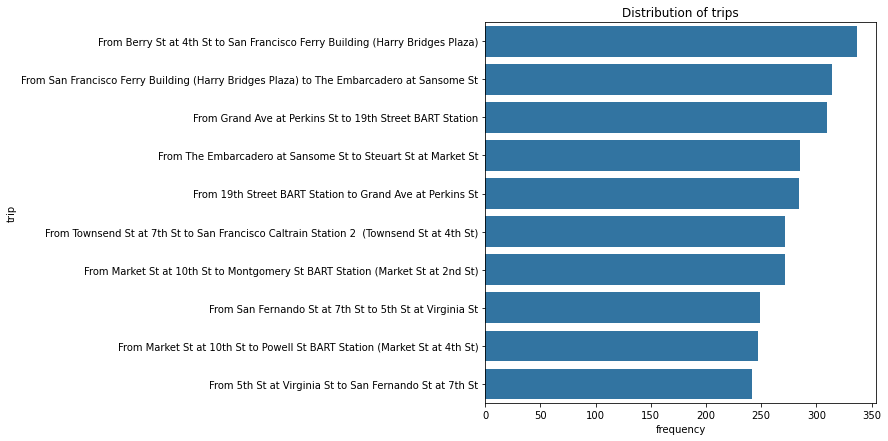

In [8]:
df['trip'] = "From " + df['start_station_name'] + " to " + df['end_station_name']

base_color = sb.color_palette()[0]
order = df.trip.value_counts().index[:10]
plt.figure(figsize=(7, 7))
sb.countplot(data = df, y = "trip",color = base_color, order = order)
plt.title("Distribution of trips")
plt.ylabel("trip")
plt.xlabel("frequency")
plt.show()

In [11]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 439741 bytes to slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\anaconda\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\anaconda\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 